##### Due to the diverse nature of the population, it is imperative to fully understand the content consumption trend of the people in order to promote better content to cater to all likes of people and to compete against other streaming platforms.

##### This research is aimed at exploring the ways Netflix could use it's data to discover insights on how to optimize it's content delivery and improve revenue

In [884]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import mode

In [885]:
#reading the dataset from the given URL
df = pd. read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

<h3><u>Preliminary Analysis

In [886]:
df.shape

(8807, 12)

In [887]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##### show_id can be dropped as it is irrelevant

In [888]:
df.drop('show_id', 1, inplace = True) #dropping show_id

C:\Users\Interviewbit\AppData\Local\Temp\ipykernel_5112\3460406236.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('show_id', 1, inplace = True) #dropping show_id


In [889]:
df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [890]:
df.columns #checking column names

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [891]:
df.info() #cheking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


In [892]:
df.describe(include = 'object').T 

,count,unique,top,freq
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


In [893]:
df.isnull().sum() #checking null value counts

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h4>As per the preliminary observation the dataset mainly contains:</h4><br>
- 2 content types (TV shows and Movies)<br>
- 8807 titles<br>
- 4528 unique directors<br>
- 748 countries<br>
- 17 types of ratings<br>
- and 515 genres<br>

Of which 2634 directors, 825 cast and 831 countries, 10 date added, 4 ratings and 3 duration data are missing.

## ----------------------------------------------------------------------------------------------------------

<h3><u>Handling Missing Data

In [894]:
df.isnull().sum()/len(df)*100 #null value data percentage

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Highest amount of missing data is for director(30%), cast(9%) and country(9%).<br>
Filling missing values for each...


# 

<h5><u> filling missing values for rating

In [895]:
df['rating'].isna().sum()

4

In [896]:
df[df['rating'].isna()] 

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [897]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [898]:
df['rating'].fillna("NR", inplace = True) #replacing null values with 'NR'

In [899]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

Missing ratings data has been changed to 'NR' (Not Rated).<br>
Incorrect data will be replaced in the next step.

# 

<h5><u> filling missing values for duration

In [900]:
df['duration'].isna().sum()

3

In [901]:
df[df['duration'].isna()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


the missing duration for these movies is avaialble in the rating column

In [902]:
#copying the duration from rating column to duration column
df.loc[5541,'duration'] = df.loc[5541,'rating']
df.loc[5794,'duration'] = df.loc[5794,'rating']
df.loc[5813,'duration'] = df.loc[5813,'rating']

In [903]:
df['duration'].isna().sum()

0

replacing these false values with "NR" in the rating column 

In [904]:
#replacing the incorrect data from ratings to 'NR'
df['rating'].replace('74 min','NR', inplace = True)
df['rating'].replace('84 min','NR', inplace = True)
df['rating'].replace('66 min','NR', inplace = True)

In [905]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

# 

<h5><u> dropping missing values for date_added

In [906]:
df['date_added'].isna().sum()

10

In [907]:
df.dropna(subset = ['date_added'], inplace = True) #dropping rows without date added

In [908]:
df['date_added'].isna().sum()

0

In [909]:
df.shape

(8797, 11)

# 

<h5><u> filling missing values for country

In [910]:
df['country'].isna().sum()

830

In [911]:
#filling missing country values with most frequent country
df['country'] = df['country'].fillna(df['country'].mode()[0]) 

In [912]:
df['country'].isna().sum()

0

## ----------------------------------------------------------------------------------------------------------

<h5><u>splitting the date to day, month and year

In [913]:
df['date_added'] = pd.to_datetime(df["date_added"])

In [914]:
#storing day, month and year separately in newly created columns in the dataframe
df['added_day'] = df['date_added'].dt.day.astype(int)
df['added_month'] = df['date_added'].dt.month.astype(int)
df['added_year'] = df['date_added'].dt.year.astype(int)

In [915]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_day,added_month,added_year
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021
3,TV Show,Jailbirds New Orleans,NaN,NaN,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021


# 

<h5> <u> creating a new DF to store title and each cast

In [916]:
constraint = df['cast'].apply(lambda x: str(x).split(',')).tolist()

In [917]:
df_new = pd.DataFrame(constraint, index=df['title'])

In [918]:
df_new = df_new.stack()

In [919]:
df_new = pd.DataFrame(df_new)

In [920]:
df_new.head()

0
title                                  
Dick Johnson Is Dead 0              nan
Blood & Water        0       Ama Qamata
                     1      Khosi Ngema
                     2    Gail Mabalane
                     3   Thabang Molaba

In [921]:
df_new.T

title Dick Johnson Is Dead Blood & Water                                \
                         0             0             1               2   
0                      nan    Ama Qamata   Khosi Ngema   Gail Mabalane   

title                                                                      \
                     3                  4                 5             6   
0       Thabang Molaba   Dillon Windvogel   Natasha Thahane   Arno Greeff   

title                                        ...       Zoom                 \
                        7                 8  ...          7              8   
0       Xolile Tshabalala   Getmore Sithole  ...   Rip Torn   Kevin Zegers   

title         Zubaan                                                         \
                   0                 1                 2                  3   
0      Vicky Kaushal   Sarah-Jane Dias   Raaghav Chanana   Manish Chaudhary   

title                                                                          
                   4               5                6                       7  
0       Meghna Malik   Malkeet Rauni   Anita Shabdish   Chittaranjan Tripathy  

[1 rows x 64882 columns]

## ----------------------------------------------------------------------------------------------------------

<h3><u>Data Analysis

In [922]:
df.describe()

,release_year,added_day,added_month,added_year
count,8797.000000,8797.000000,8797.000000,8797.000000
mean,2014.183472,12.497329,6.654996,2018.871888
std,8.822191,9.887551,3.436554,1.574243
min,1925.000000,1.000000,1.000000,2008.000000
25%,2013.000000,1.000000,4.000000,2018.000000
50%,2017.000000,13.000000,7.000000,2019.000000
75%,2019.000000,20.000000,10.000000,2020.000000
max,2021.000000,31.000000,12.000000,2021.000000


<AxesSubplot:xlabel='release_year', ylabel='Count'>

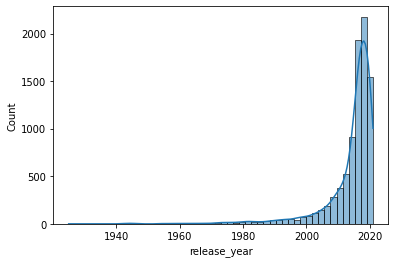

In [923]:
sns.histplot(df['release_year'], bins = 50, kde = True)

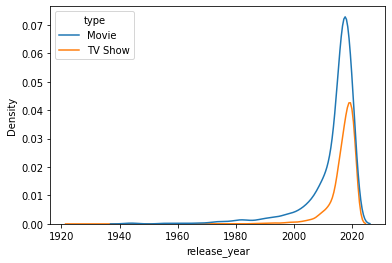

In [924]:
sns.kdeplot(data = df, x = 'release_year', hue = 'type') 
plt.show()

<b>Majority of the content uploaded to the platform was released around the year 2019 - 2020

In [925]:
df['type'].value_counts(normalize = True)

Movie      0.696942
TV Show    0.303058
Name: type, dtype: float64

<AxesSubplot:title={'center':'Type of Content'}, ylabel='type'>

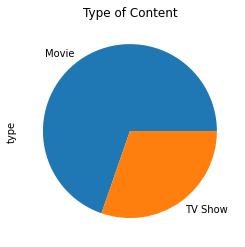

In [926]:
df['type'].value_counts().plot(kind = 'pie', title = 'Type of Content')

<b>Over 69% of content in netflix are movies

<AxesSubplot:title={'center':'Added Month'}, xlabel='Day,Type', ylabel='Number of additions'>

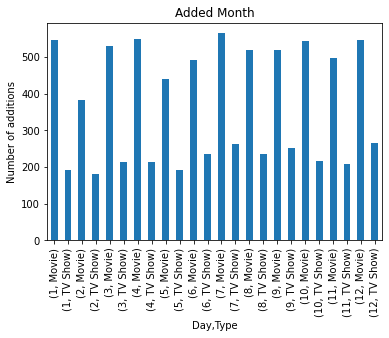

In [927]:
df.groupby('added_month')['type'].value_counts().plot(kind = 'bar',title = 'Added Month',xlabel = 'Day,Type', ylabel = 'Number of additions')

<b>Most content are added during the middle(july) or the end(december) of a year. February saw the least added.

<AxesSubplot:title={'center':'Added Year'}, xlabel='added_day,added_day', ylabel='Number of additions'>

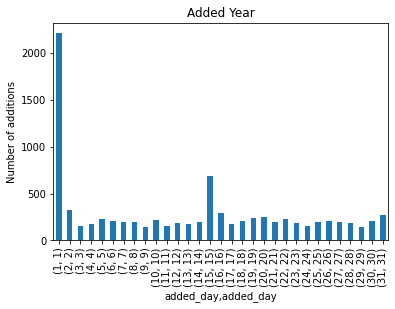

In [928]:
df.groupby('added_day')['added_day'].value_counts().plot(kind = 'bar', title = 'Added Year',ylabel = 'Number of additions')

<b> Majority of the content are uploaded on the first day of a month, and a lot of it on the mid of the month as well

<AxesSubplot:>

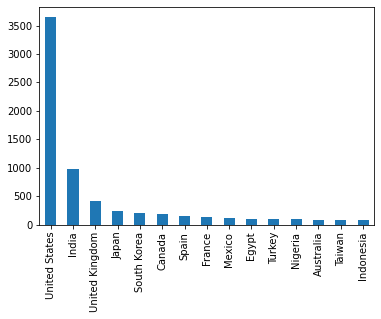

In [929]:
df['country'].value_counts().head(15).plot(kind = 'bar')

<b> United States has the highest number of releases, India follows as the second

# 

In [930]:
df['director'].value_counts().head(15)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Don Michael Paul          10
David Dhawan               9
Yılmaz Erdoğan             8
Lance Bangs                8
Kunle Afolayan             8
Name: director, dtype: int64

<b> > <u>The top contributor is an Indian Director Rajiv Chilaka   

In [931]:
#getting more info on Rajiv Chilaka
df.loc[df['director']=='Rajiv Chilaka'].groupby('listed_in').count()

,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_day,added_month,added_year
listed_in,,,,,,,,,,,,,
Children & Family Movies,18,18,18,16,18,18,18,18,18,18,18,18,18
"Children & Family Movies, Sports Movies",1,1,1,1,1,1,1,1,1,1,1,1,1


<b> The top contributing director has only released 'Children and Family Movies'

<b>> <u> The 2nd highest contributor is an american portugese duo Raúl Campos, Jan Suter

In [932]:
#getting more info on Raúl Campos, Jan Suter
df.loc[df['director']=='Raúl Campos, Jan Suter'].groupby('listed_in').count()

,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_day,added_month,added_year
listed_in,,,,,,,,,,,,,
Stand-Up Comedy,18,18,18,18,18,18,18,18,18,18,18,18,18


<b> The 2nd highest contributing director has only released 'Stand-Up Comedy Shows'

In [933]:
#getting more info on Marcus Raboy(3rd top contributor)
df.loc[df['director']=='Marcus Raboy'].groupby('listed_in').count()

,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_day,added_month,added_year
listed_in,,,,,,,,,,,,,
Stand-Up Comedy,15,15,15,15,15,15,15,15,15,15,15,15,15
"Stand-Up Comedy & Talk Shows, TV Comedies",1,1,1,1,1,1,1,1,1,1,1,1,1


<b> The 3rd highest contributing director has only released 'Stand-Up Comedy, Talk Shows and TV Comedies'

In [934]:
#getting more info on Suhas Kadav (4rd top contributor)
df.loc[df['director']=='Suhas Kadav'].groupby('listed_in').count()

,type,title,director,cast,country,date_added,release_year,rating,duration,description,added_day,added_month,added_year
listed_in,,,,,,,,,,,,,
Children & Family Movies,5,5,5,2,5,5,5,5,5,5,5,5,5
"Children & Family Movies, Comedies",6,6,6,6,6,6,6,6,6,6,6,6,6
"Children & Family Movies, Comedies, Music & Musicals",2,2,2,2,2,2,2,2,2,2,2,2,2
"Children & Family Movies, Music & Musicals",3,3,3,3,3,3,3,3,3,3,3,3,3


<b> The 4rd highest contributing director has only released 'Children and Family Movies'

#### Clearly, Kids Entertainment and Comedy Programs seems to be very popular

In [935]:
listed_in = ", ".join(df['listed_in']).split(", ") #splitting

In [936]:
c = Counter(listed_in)
c.most_common(10)

[('International Movies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('International TV Shows', 1350),
 ('Documentaries', 869),
 ('Action & Adventure', 859),
 ('TV Dramas', 762),
 ('Independent Movies', 756),
 ('Children & Family Movies', 641),
 ('Romantic Movies', 616)]

<b> However, the highest number of content are international movies and dramas, even though comedy comes at a third

# 

In [937]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<i>Ratings can be categorized as below:<br>
Kids -> PG, TV-PG, TV-Y, TV-Y7, TV-G, G, TV-Y7-FV<br>
Middle -> PG-13, TV-14<br>
Adults -> TV-MA, R, NC-17, NR, UR<br></i>

In [938]:
df['rating'].value_counts(normalize = True)*100

TV-MA       36.432875
TV-14       24.519723
TV-PG        9.787428
R            9.082642
PG-13        5.570081
TV-Y7        3.785381
TV-Y         3.478459
PG           3.262476
TV-G         2.500853
NR           0.977606
G            0.466068
TV-Y7-FV     0.068205
NC-17        0.034103
UR           0.034103
Name: rating, dtype: float64

<b> 36% of the content is intended for adults, and over 50% of the entire content is rated for above 14 years of age

# 

In [939]:
df_new.value_counts(sort = True).head(10)

nan                  825
 Anupam Kher          39
 Rupa Bhimani         31
 Takahiro Sakurai     30
 Julie Tejwani        28
 Om Puri              27
 Rajesh Kava          26
Shah Rukh Khan        26
 Paresh Rawal         25
 Boman Irani          25
dtype: int64

<b> The cast chart is dominated by indian actors

## FINAL RECOMMENDATIONS

1. Over 69% of the netflix catalog are movies - movies seem to be trending


2. Data shows that over 2000 new content is uploaded on the 1st of every month, and over 600 during mid month. Hence the recommended day to upload new content is the first of every month


3. The months in which content is uploaded seems to be stable throughout and mostly dependendent on the release, however it is not recommended to upload content on the month of February as it showed the lowest addition rate.


4. The top cast chart seems to be dominated by Indian actors such as Anupam Kher and Om Puri, however the majority of releases are seen in the United States. Netflix should focus on releasing more content more frequently in India.


5. The top 3 directors produce kids and comedy content, however the most number of content added are International Movies, with over 2700 added, where as comedy is only at the 3rd position with a count of 1674 and kids content way below at around 600. Also according to the ratings, over 50% of the content is for audiences 15 years and above. Hence it is highly recommended that more kids friendly content be added to the platform to increase viewership. Netflix could also focus on adding kid friendly comedy shows to get the benifit of both the younger and adult audience alike.


6. It is also worth noting that 2 directors among the 4 create animated movies and TV shows. More focus on better animated content would also increase viewership mainly among children.